In [1]:
import ee
import geemap
from geeopca import geeopca

In [2]:
ee.Initialize()

In [3]:

aoi = ee.Geometry.Polygon(
    [
        [-77.4467, 44.1024],
        [-77.4467, 44.2352],
        [-77.2686, 44.2352],
        [-77.2686, 44.1024],
        [-77.4467, 44.1024],
    ]
)

SYSTEM_PREFIX = "COPERNICUS/S2_HARMONIZED"
DATES = [(f'{year}-04-01', f'{year}-10-31') for year in range(2017, 2024)]

In [4]:
dataset = geeopca.EarthEngineDataset(SYSTEM_PREFIX, aoi=aoi, dates=DATES)
dataset = dataset.filter_out_clouds("CLOUDY_PIXEL_PERCENTAGE").add_system_prefix()

In [5]:
gdf = geeopca.convert_2_dataframe(dataset)

# def process(row):
#     elements = row.split("_")
#     return "_".join([elm for elm in elements if not elm.isdigit()])

# gdf['sysid'] = gdf['sysid'].apply(process)
gdf.head()

,geometry,sysid,system_prefix,utc
0,"POLYGON ((-77.44500 44.22733, -77.44502 44.227...",1_1_1_1_1_1_20170611T161351_20170611T161345_T1...,COPERNICUS/S2_HARMONIZED,1497197625460
1,"POLYGON ((-77.48083 44.13854, -77.48077 44.138...",1_1_1_1_1_1_20170611T161351_20170611T161345_T1...,COPERNICUS/S2_HARMONIZED,1497197625460
2,"POLYGON ((-77.50419 44.22598, -77.50420 44.225...",1_1_1_1_1_1_20170621T161341_20170621T161517_T1...,COPERNICUS/S2_HARMONIZED,1498061717260
3,"POLYGON ((-77.43574 44.22753, -77.43577 44.227...",1_1_1_1_1_1_20170701T161341_20170701T161454_T1...,COPERNICUS/S2_HARMONIZED,1498925694610
4,"POLYGON ((-77.51674 44.52233, -77.51686 44.522...",1_1_1_1_1_1_20170721T161351_20170721T162051_T1...,COPERNICUS/S2_HARMONIZED,1500654051180


In [6]:
# date time processing
gdf = geeopca.make_system_index(gdf)
gdf = geeopca.process_date_time(gdf)
gdf.head()

,geometry,sysid,system_prefix,utc,system_index,x,y,timezone,timestamp,year,julian_date
0,"POLYGON ((-77.44500 44.22733, -77.44502 44.227...",20170611T161351_20170611T161345_T18TUP,COPERNICUS/S2_HARMONIZED,1.497198e+09,COPERNICUS/S2_HARMONIZED/20170611T161351_20170...,-77.482410,44.181806,America/Toronto,2017-06-11 12:13:45.460000038-04:00,2017,162
1,"POLYGON ((-77.48083 44.13854, -77.48077 44.138...",20170611T161351_20170611T161345_T18TUQ,COPERNICUS/S2_HARMONIZED,1.497198e+09,COPERNICUS/S2_HARMONIZED/20170611T161351_20170...,-77.372628,44.786364,America/Toronto,2017-06-11 12:13:45.460000038-04:00,2017,162
2,"POLYGON ((-77.50419 44.22598, -77.50420 44.225...",20170621T161341_20170621T161517_T18TUP,COPERNICUS/S2_HARMONIZED,1.498062e+09,COPERNICUS/S2_HARMONIZED/20170621T161341_20170...,-77.479250,44.175426,America/Toronto,2017-06-21 12:15:17.259999990-04:00,2017,172
3,"POLYGON ((-77.43574 44.22753, -77.43577 44.227...",20170701T161341_20170701T161454_T18TUP,COPERNICUS/S2_HARMONIZED,1.498926e+09,COPERNICUS/S2_HARMONIZED/20170701T161341_20170...,-77.478795,44.174386,America/Toronto,2017-07-01 12:14:54.609999895-04:00,2017,182
4,"POLYGON ((-77.51674 44.52233, -77.51686 44.522...",20170721T161351_20170721T162051_T18TUQ,COPERNICUS/S2_HARMONIZED,1.500654e+09,COPERNICUS/S2_HARMONIZED/20170721T161351_20170...,-77.453202,44.369485,America/Toronto,2017-07-21 12:20:51.180000067-04:00,2017,202


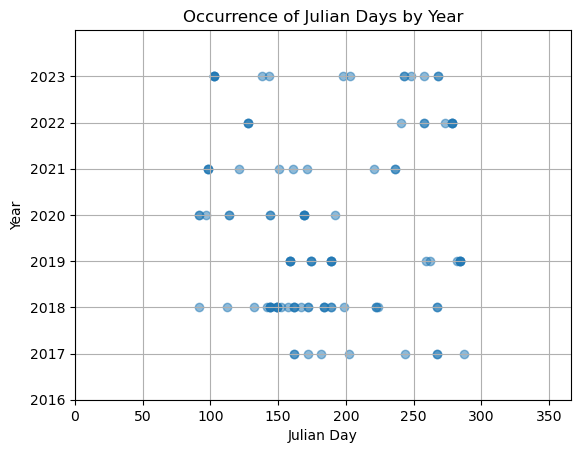

In [7]:
figure = geeopca.date_time_scatter_plot(gdf)
geeopca.save_plot(figure)


In [8]:
geeopca.gdf_to_json(gdf)